## Python 3.10.11

In [19]:
!pip install --default-timeout=1000 tensorflow==2.8.0 tensorflow-gpu==2.8.0 streamlit==1.35.0 matplotlib==3.6.3 numpy==1.26.4 pandas==2.2.2

  Using cached tensorflow-2.8.0-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached tensorflow_gpu-2.8.0-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached streamlit-1.35.0-py2.py3-none-any.whl.metadata (8.5 kB)
Using cached tensorflow-2.8.0-cp310-cp310-win_amd64.whl (438.0 MB)
Using cached tensorflow_gpu-2.8.0-cp310-cp310-win_amd64.whl (438.0 MB)
Using cached streamlit-1.35.0-py2.py3-none-any.whl (8.6 MB)


In [20]:
!pip install protobuf==3.20.0

In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      0.15.0
albumentations               1.4.7
altair                       5.3.0
annotated-types              0.7.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
blinker                      1.8.2
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
dill                         0.3.8
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.14.0
flatbuffers                  1.12
fonttools                    4.51.0
fsspec                       2024.5.0
future                       


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [6]:
img_width = 180
img_height = 180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 359 files belonging to 36 classes.


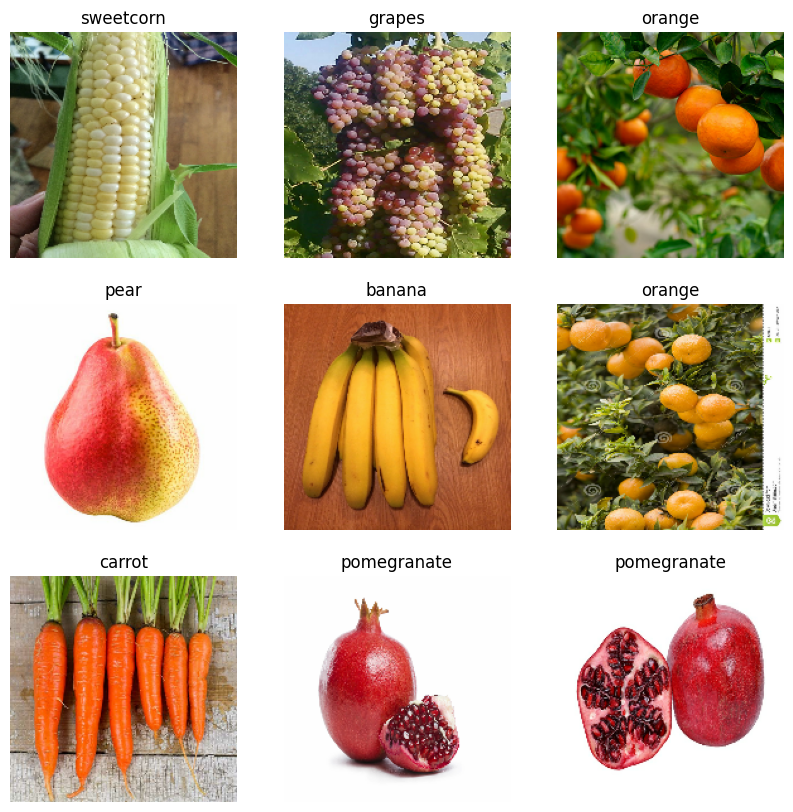

In [12]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat)),
    ]
)

In [15]:
for images, _ in data_train.take(1):
    model(images)

In [16]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 90, 90, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 45, 45, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 45, 45, 64)          1

In [18]:
epochs_size = 100
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/100
98/98 [==============================] - 28s 265ms/step - loss: 3.4532 - accuracy: 0.0921 - val_loss: 2.4153 - val_accuracy: 0.3276
Epoch 2/100
98/98 [==============================] - 18s 168ms/step - loss: 2.4499 - accuracy: 0.2873 - val_loss: 1.6578 - val_accuracy: 0.5299
Epoch 3/100
98/98 [==============================] - 19s 178ms/step - loss: 2.0059 - accuracy: 0.4199 - val_loss: 1.2190 - val_accuracy: 0.6610
Epoch 4/100
98/98 [==============================] - 19s 173ms/step - loss: 1.5164 - accuracy: 0.5676 - val_loss: 0.7989 - val_accuracy: 0.7863
Epoch 5/100
98/98 [==============================] - 17s 162ms/step - loss: 0.9241 - accuracy: 0.7371 - val_loss: 0.4894 - val_accuracy: 0.8689
Epoch 6/100
98/98 [==============================] - 17s 162ms/step - loss: 0.4717 - accuracy: 0.8668 - val_loss: 0.3272 - val_accuracy: 0.9316
Epoch 7/100
98/98 [==============================] - 17s 162ms/step - loss: 0.3104 - accuracy: 0.9152 - val_loss: 0.3258 - val_accuracy:

Text(0.5, 1.0, 'Loss')

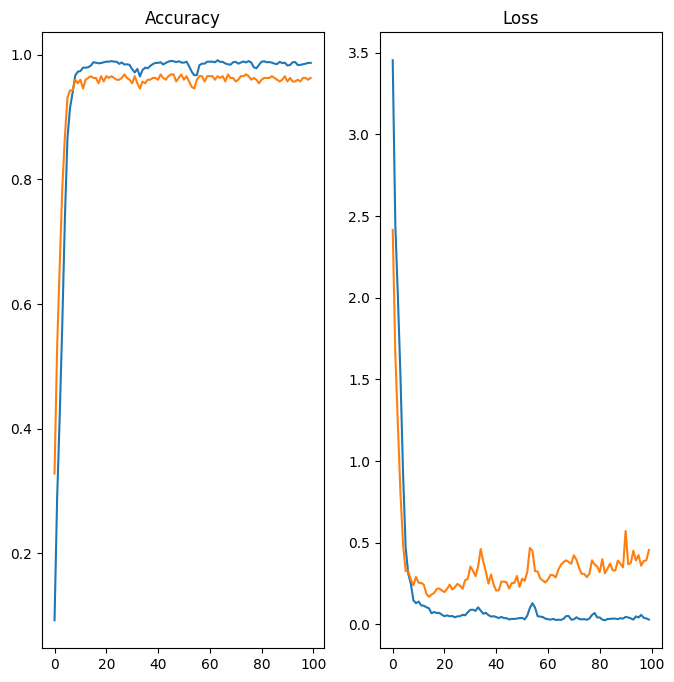

In [19]:
epoch_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history["accuracy"], label="Training Accuracy")
plt.plot(epoch_range, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")

In [20]:
image = "paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

In [21]:
predict = model.predict(img_batch)

In [22]:
score = tf.nn.softmax(predict)

In [23]:
print(
    "vegetable/fruit in image is {} with accuracy of {:.2f}%".format(
        data_cat[np.argmax(score)], np.max(score) * 100
    )
)

vegetable/fruit in image is paprika with accuracy of 99.98%


In [24]:
model.save("Image_Classification.keras")